### Installs (restart kernal after)

In [ ]:
pip install mapie

In [5]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/cseguo/akamrath2/.local/lib/python3.8/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: MAPIE
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show mapie

Name: MAPIE
Version: 0.8.6
Summary: A scikit-learn-compatible module for estimating prediction intervals.
Home-page: https://github.com/scikit-learn-contrib/MAPIE
Author: 
Author-email: 
License: new BSD
Location: /home/cseguo/akamrath2/.local/lib/python3.8/site-packages
Requires: numpy, packaging, scikit-learn, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### Imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
from mapie.classification import MapieClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

### Import Model

In [ ]:
model_names = [
    "OneHigh",
    "OneLow",
    "TwoHigh",
    "TwoLow",
    "TwoTypes",
    "ThreeTypes",
    "FourTypes",
]
one_high_len = 910
one_low_len = 3624
two_high_len = 900
two_low_len = 3599
models = []
for name in model_names:
    model = load("./Models/" + name + ".joblib")
    models.append(model)

print("Done Importing.")

### Import Training and Testing Data

In [ ]:
x_test = np.load("./Testing/x_test.npy")
y_test = np.load("./Testing/y_test.npy")
x_train = np.load("./Testing/x_train.npy")
y_train = np.load("./Testing/y_train.npy")

one_high_len = 910
one_low_len = 3624
two_high_len = 900
two_low_len = 3599


# Split up test data for different response types
x_tests = []
x_tests.append(x_test[:, :one_high_len])
x_tests.append(x_test[:, one_high_len : one_low_len + one_high_len])
x_tests.append(
    x_test[:, one_high_len + one_low_len : one_high_len + one_low_len + two_high_len]
)
x_tests.append(
    x_test[
        :,
        one_high_len
        + one_low_len
        + two_high_len : one_high_len
        + one_low_len
        + two_high_len
        + two_low_len,
    ]
)
x_tests.append(x_test[:, : one_low_len + one_high_len])
x_tests.append(x_test[:, : two_high_len + one_high_len + one_low_len])
x_tests.append(x_test)

### Import and Rearrange Data (for multiple response types)

(500, 910, 52)
(500, 3624, 52)
(500, 900, 52)
(500, 3599, 52)
Done with One High
Done with One Low
Done with Two High
Done with Two Low
(500, 9033, 52)
(26000, 9033)


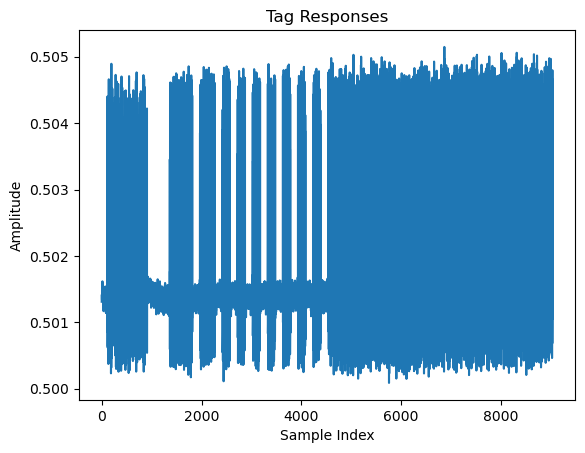

In [ ]:
data_one_high = np.load(
    "OneHigh_.npy", allow_pickle=True
)
data_one_low = np.load(
    "OneLow_.npy", allow_pickle=True
)
data_two_high = np.load(
    "TwoHigh_.npy", allow_pickle=True
)
data_two_low = np.load(
    "TwoLow_.npy", allow_pickle=True
)


print(data_one_high.shape)
print(data_one_low.shape)
print(data_two_high.shape)
print(data_two_low.shape)

normalization_point = 0.5
for i in range(52):
    data = np.abs(data_one_high[:, :, i])
    min_point = np.min(data)
    diff = min_point - normalization_point
    data_one_high[:, :, i] = np.abs(data_one_high[:, :, i]) - diff

print("Done with One High")

for i in range(52):
    data = np.abs(data_one_low[:, :, i])
    min_point = np.min(data)
    diff = min_point - normalization_point
    data_one_low[:, :, i] = np.abs(data_one_low[:, :, i]) - diff

print("Done with One Low")

for i in range(52):
    data = np.abs(data_two_high[:, :, i])
    min_point = np.min(data)
    diff = min_point - normalization_point
    data_two_high[:, :, i] = np.abs(data_two_high[:, :, i]) - diff

print("Done with Two High")

for i in range(52):
    data = np.abs(data_two_low[:, :, i])
    min_point = np.min(data)
    diff = min_point - normalization_point
    data_two_low[:, :, i] = np.abs(data_two_low[:, :, i]) - diff

print("Done with Two Low")

dataset = np.concatenate(
    (data_one_high, data_one_low, data_two_high, data_two_low), axis=1
)  # Change this to only concatenate response types wanted

print(dataset.shape)

X_combined = np.empty(
    (dataset.shape[0] * dataset.shape[2], dataset.shape[1]), dtype=np.complex_
)
labels = np.empty((dataset.shape[0] * dataset.shape[2]))
for card in range(dataset.shape[2]):
    responses = dataset[:, :, card]
    X_combined[
        card * dataset.shape[0] : card * dataset.shape[0] + dataset.shape[0], :
    ] = responses
    labels[card * dataset.shape[0] : card * dataset.shape[0] + dataset.shape[0]] = card
dataset = np.abs(X_combined)
print(dataset.shape)

plt.figure(1)
plt.plot(dataset[10000, :])
plt.title("Tag Responses")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# Save the figure as a PNG file
# plt.savefig('concatenated_response.png')
plt.show()

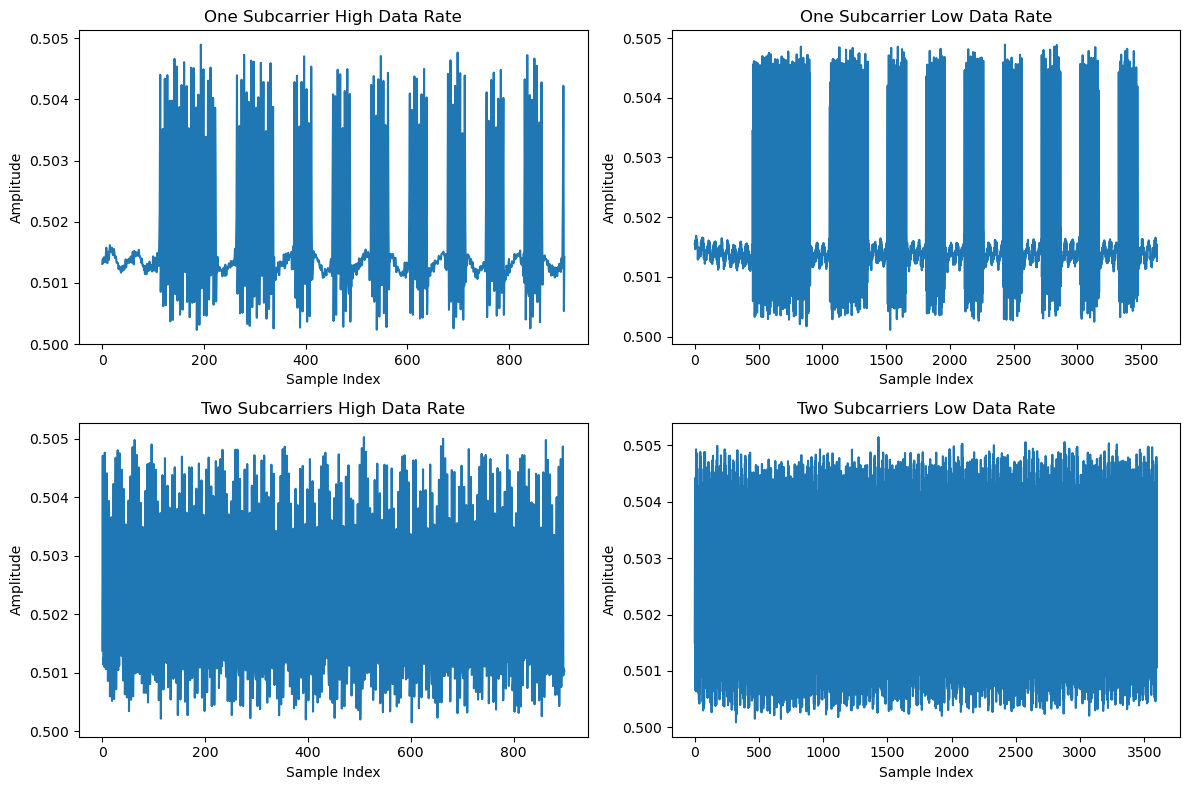

In [9]:
# Create a figure and axes
plt.figure(figsize=(12, 8))

# Plotting each response type
plt.subplot(2, 2, 1)
plt.plot(dataset[10000, :910])
plt.title("One Subcarrier High Data Rate")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.plot(dataset[10000, 910 : 910 + 3624])
plt.title("One Subcarrier Low Data Rate")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 3)
plt.plot(dataset[10000, 910 + 3624 : 910 + 3624 + 900])
plt.title("Two Subcarriers High Data Rate")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 4)
plt.plot(dataset[10000, 910 + 3624 + 900 :])
plt.title("Two Subcarriers Low Data Rate")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file
# plt.savefig('nfc_response_types.png')

# Show the plot (optional)
plt.show()

### MAPIE Training

In [ ]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mapie.classification import MapieClassifier
from joblib import dump, load
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
data_one_high = np.load("OneHigh_.npy", allow_pickle=True)
data_one_low = np.load("OneLow_.npy", allow_pickle=True)
data_two_high = np.load("TwoHigh_.npy", allow_pickle=True)
data_two_low = np.load("TwoLow_.npy", allow_pickle=True)

In [ ]:
# Normalize datasets
normalization_point = 0.5

def normalize_data(data):
    for i in range(52):
        data_abs = np.abs(data[:, :, i])
        min_point = np.min(data_abs)
        diff = min_point - normalization_point
        data[:, :, i] = np.abs(data[:, :, i]) - diff
    return data


In [ ]:
# Normalize each dataset individually
data_one_high = normalize_data(data_one_high)
print("Done with One High normalization")
data_one_low = normalize_data(data_one_low)
print("Done with One Low normalization")
data_two_high = normalize_data(data_two_high)
print("Done with Two High normalization")
data_two_low = normalize_data(data_two_low)
print("Done with Two Low normalization")

# Concatenate datasets for training
dataset = np.concatenate((data_one_high, data_one_low, data_two_high, data_two_low), axis=1)
X_combined = np.empty((dataset.shape[0] * dataset.shape[2], dataset.shape[1]), dtype=np.complex_)
labels = np.empty((dataset.shape[0] * dataset.shape[2]))

for card in range(dataset.shape[2]):
    responses = dataset[:, :, card]
    start_idx = card * dataset.shape[0]
    end_idx = start_idx + dataset.shape[0]
    X_combined[start_idx:end_idx, :] = responses
    labels[start_idx:end_idx] = card

# Convert to absolute values for training
dataset = np.abs(X_combined)
print("Processed dataset shape:", dataset.shape)

# Split dataset for training and testing
num_tags = 52
x = dataset[: 500 * num_tags]
y = labels[: 500 * num_tags]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
# Save train and test sets
os.makedirs('./Testing', exist_ok=True)
np.save('./Testing/x_test', x_test)
np.save('./Testing/y_test', y_test)
np.save('./Testing/x_train', x_train)
np.save('./Testing/y_train', y_train)
print('Exported Testing and Training Data.')

# Define lengths for sub-carrier response types
one_high_len = 910
one_low_len = 3624
two_high_len = 900
two_low_len = 3599

# Model training function with resume functionality
def train_and_save_model(features, labels, model_name):
    model_path = f'./Models/{model_name}.joblib'
    os.makedirs('./Models', exist_ok=True)
    
    # Check if model already exists
    if os.path.exists(model_path):
        print(f"{model_name} model already exists. Loading saved model.")
        mapie_clf = load(model_path)
        try:
            mapie_clf.predict(features[:5])  # Try to make a prediction to verify if it's properly trained
            print(f"{model_name} is already trained.")
            return  # If no exception, model is properly trained
        except Exception as e:
            print(f"{model_name} is not fully trained. Training will continue...")

    print(f"Training {model_name}...")
    base_clf = RandomForestClassifier()
    mapie_clf = MapieClassifier(estimator=base_clf, method="score")
    
    # **Fit the model using x_train and y_train**
    mapie_clf.fit(features, labels)
    
    # Perform cross-validation
    accuracy_scores = cross_val_score(mapie_clf, features, labels, cv=3, scoring="accuracy")
    print(f"{model_name} Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
    
    # Save the trained model
    dump(mapie_clf, model_path)
    print(f"{model_name} model saved at {model_path}")

# Train or load models for various dataset combinations
train_and_save_model(x_train[:, :one_high_len], y_train, "OneHigh")
train_and_save_model(x_train[:, one_high_len:one_high_len + one_low_len], y_train, "OneLow")
train_and_save_model(x_train[:, one_high_len + one_low_len:one_high_len + one_low_len + two_high_len], y_train, "TwoHigh")
train_and_save_model(x_train[:, one_high_len + one_low_len + two_high_len:one_high_len + one_low_len + two_high_len + two_low_len], y_train, "TwoLow")
train_and_save_model(x_train[:, : one_low_len + one_high_len], y_train, "TwoTypes")
train_and_save_model(x_train[:, : two_high_len + one_high_len + one_low_len], y_train, "ThreeTypes")
train_and_save_model(x_train, y_train, "FourTypes")

print("Training completed and models saved.")


In [ ]:
# Load and test the models on the testing data, collecting accuracies
test_accuracies = []
combination_names = ["OneHigh", "OneLow", "TwoHigh", "TwoLow", "TwoTypes", "ThreeTypes", "FourTypes"]

# Define test subsets for each model's input requirements
test_combinations = [
    x_test[:, :one_high_len],
    x_test[:, one_high_len:one_high_len + one_low_len],
    x_test[:, one_high_len + one_low_len:one_high_len + one_low_len + two_high_len],
    x_test[:, one_high_len + one_low_len + two_high_len:one_high_len + one_low_len + two_high_len + two_low_len],
    x_test[:, :one_low_len + one_high_len],
    x_test[:, :two_high_len + one_high_len + one_low_len],
    x_test
]

for model_name, test_data in zip(combination_names, test_combinations):
    model_path = f'./Models/{model_name}.joblib'
    if os.path.exists(model_path):
        mapie_clf = load(model_path)
        try:
            test_accuracy = mapie_clf.score(test_data, y_test)
            test_accuracies.append(test_accuracy * 100)
            print(f"{model_name} Test Accuracy: {test_accuracy * 100:.2f}%")
        except Exception as e:
            print(f"Error in testing {model_name}: {e}")